In [1]:
import os
from os import path
import json

import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATASET_DIR = "../../fakenewsnet_dataset"
DATASET_DIR = path.abspath( DATASET_DIR )

NEWS_DIR = f"{DATASET_DIR}/politifact/fake"

In [3]:
def tree_size(root_node):

    node_count = 1 # itself

    children = [] + root_node["quoted_by"] + root_node["replied_by"] + root_node["retweeted_by"]
    for child in children:
        node_count += tree_size(child)

    return node_count

In [4]:
def cascade_metadata(news_dir_path, root_node):
    
    with open(f"{news_dir_path}/tweets/{root_node['id']}.json", "r") as tweet_file:
        tweet = json.loads(tweet_file.read())
        hashtag_number = len(tweet['entities']['hashtags'])
        mention_number = len(tweet['entities']['user_mentions'])
        url_number = len(tweet['entities']['urls'])
        
        media_number = 0
        if "media" in tweet['entities']:
            media_number = len(tweet['entities']['media'])
            
        metadata_number = hashtag_number + mention_number + url_number + media_number
        
        children = [] + root_node["quoted_by"] + root_node["replied_by"]
        for child in children:
            child_metadata_number = cascade_metadata(news_dir_path, child)
            metadata_number += child_metadata_number
            
        return metadata_number

In [17]:
news_count = 0
sizes = []
meta_counts = []
for item in os.listdir(NEWS_DIR):
    news_dir_path = f"{NEWS_DIR}/{item}"
    
    if path.isdir(news_dir_path):

        if not path.exists(f"{news_dir_path}/news content.json"):
            continue

        if not path.exists(f"{news_dir_path}/cascade.json"):
            continue

        news_count += 1
        print(f"{news_count}: {item}")
#         if news_count > 50:
#             break
            
        with open(f"{news_dir_path}/cascade.json", "r") as cascade_file:
            cascades = json.loads(cascade_file.read())

            for cas in cascades:
                cascade_size = tree_size(cas)
                sizes.append(cascade_size)
                
                meta_n = cascade_metadata(news_dir_path, cas)
                meta_counts.append(meta_n)

1: politifact13038
2: politifact13467
3: politifact13468
4: politifact13475
5: politifact13496
6: politifact13501
7: politifact13515
8: politifact13557
9: politifact13559
10: politifact13560
11: politifact13561
12: politifact13565
13: politifact13576
14: politifact13577
15: politifact13584
16: politifact13591
17: politifact13593
18: politifact13600
19: politifact13601
20: politifact13608
21: politifact13617
22: politifact13663
23: politifact13687
24: politifact13698
25: politifact13703
26: politifact13711
27: politifact13720
28: politifact13731
29: politifact13744
30: politifact13747
31: politifact13751
32: politifact13765
33: politifact13766
34: politifact13773
35: politifact13775
36: politifact13784
37: politifact13794
38: politifact13806
39: politifact13807
40: politifact13815
41: politifact13816
42: politifact13823
43: politifact13827
44: politifact13836
45: politifact13853
46: politifact13854
47: politifact13893
48: politifact13897
49: politifact13913
50: politifact13921
51: polit

In [18]:
sizes = np.array(sizes)
meta_counts = np.array(meta_counts)

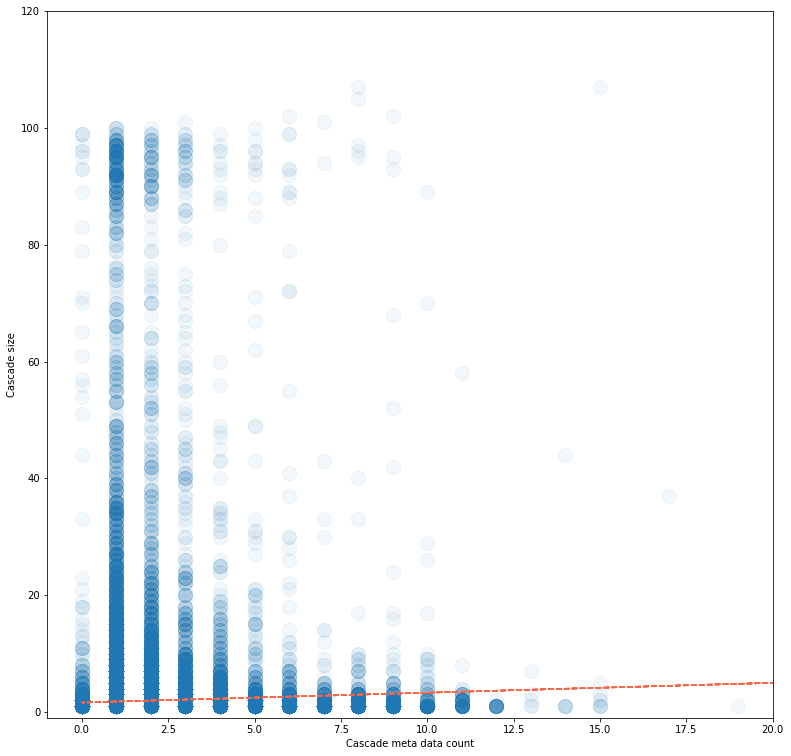

In [26]:
plt.figure( figsize=(13,13) )
# scatter plot
plt.scatter(meta_counts, sizes, alpha = 0.06, s = 200)

# linear regression
a, b = np.polyfit(meta_counts, sizes, 1)
plt.plot(meta_counts, a*meta_counts + b, color = "tomato", linewidth = 1.5, linestyle = "--")

plt.xlabel("Cascade meta data count"), plt.ylabel("Cascade size")
plt.xlim(-1, 20), plt.ylim(-1, 120)
plt.show()